In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
#Just peek the data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Taking a look at description
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
#Checking null?
data.isnull().sum()



RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#GEt to know the shape
data.shape

(10000, 14)

In [7]:
#Printing all the columns present in data
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
#Data types present in the data
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
data['IsActiveMember'] = data['IsActiveMember'].astype('category')
data['Exited'] = data['Exited'].astype('category')
data['HasCrCard'] = data['HasCrCard'].astype('category')
data.dtypes[data.dtypes == 'int64']

RowNumber        int64
CustomerId       int64
CreditScore      int64
Age              int64
Tenure           int64
NumOfProducts    int64
dtype: object

In [10]:
#Data types present in the data after doing 'category'
data.dtypes

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [11]:
# typecasting "gender" and "occupation" to category type
data['Gender'] = data['Gender'].astype('category')
data['Geography'] = data['Geography'].astype('category')

In [12]:
data = data.drop(columns = ['RowNumber','Surname'])


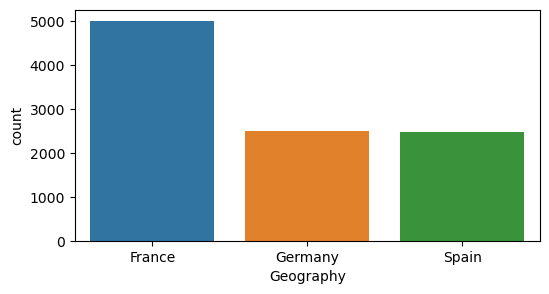

In [13]:
# Number of customers per country
plt.figure(figsize=(6,3))
axis=sns.countplot(x='Geography',data=data)

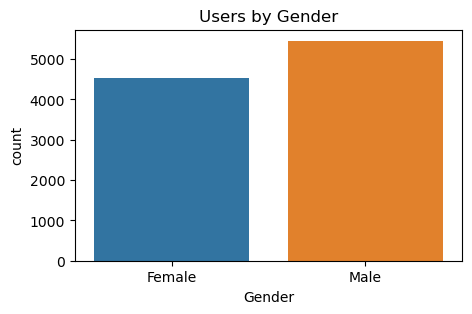

In [14]:
# Customer distribution by gender
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender', data=data)
plt.title('Users by Gender')
plt.xlabel('Gender')
plt.show()

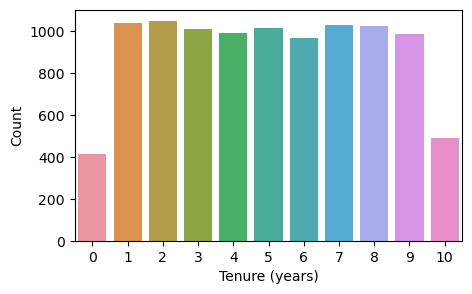

In [15]:
# Tenure distribution
plt.figure(figsize=(5, 3))
sns.countplot(x='Tenure', data=data)
plt.xlabel('Tenure (years)')
plt.ylabel('Count')
plt.show()

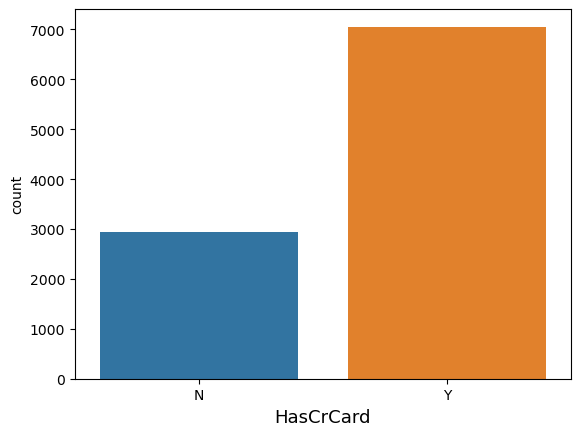

In [16]:
# Distribution of customers with credit cards
sns.countplot(x='HasCrCard', data=data)


plt.xlabel('HasCrCard', fontsize=13)
plt.xticks([0, 1], ['N', 'Y'])
plt.show()

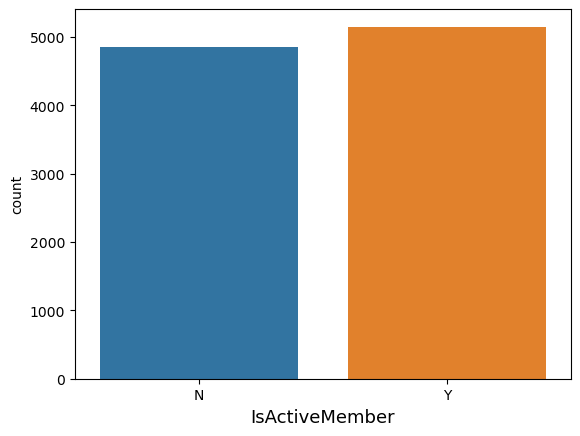

In [17]:
# Active member distribution
sns.countplot(x='IsActiveMember', data=data)


plt.xlabel('IsActiveMember', fontsize=13)
plt.xticks([0, 1], ['N', 'Y'])
plt.show()

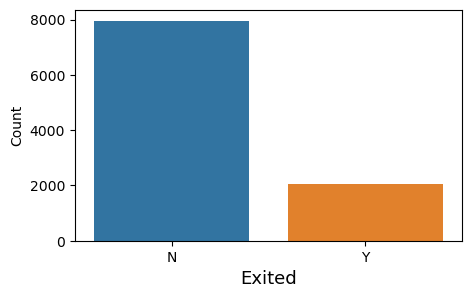

In [18]:
# Number of churned members 
plt.figure(figsize=(5, 3))
sns.countplot(x='Exited', data=data)
plt.xlabel('Exited', fontsize=13)
plt.xticks([0, 1], ['N', 'Y'])
plt.ylabel('Count')
plt.show()

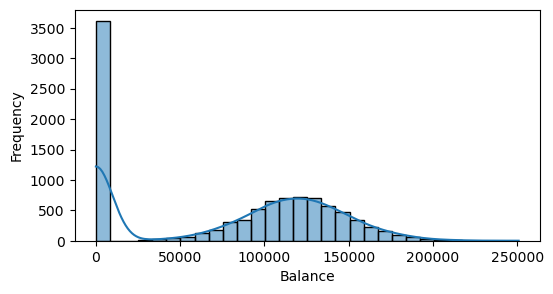

In [19]:
# Account Balance distribution
plt.figure(figsize=(6, 3))
sns.histplot(data['Balance'], bins=30, kde=True)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

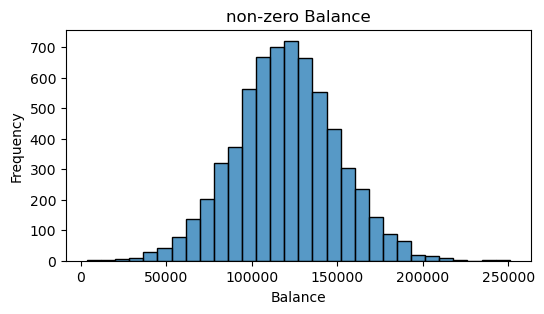

In [20]:
#Data excluding zero balances
data = data.drop(['CustomerId','Geography'], axis=1)

data_ybal = data.loc[data['Balance'] != 0, :]
data.shape[0]
data_ybal.shape[0]

plt.figure(figsize=(6, 3))
sns.histplot(data_ybal['Balance'], bins=30)
plt.title('non-zero Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Calculate churn rate by age group
def age_group(age):
    if age < 20:
        return '10y'
    elif age < 30:
        return '20y'
    elif age < 40:
        return '30y'
    elif age < 50:
        return '40y'
    elif age < 60:
        return '50y'
    elif age < 70:
        return '60y'
    else:
        return '70y & up'

data['AgeGroup'] = data['Age'].apply(age_group)

AgeGroup = ['10y', '20y', '30y', '40y', '50y', '60y', '70y & up']

for i in AgeGroup:
    AgeExited = data.loc[(data['AgeGroup'] == i) & (data['Exited'] == 1) , :].shape[0] 
    AgeData = data.loc[data['AgeGroup'] == i].shape[0]
    print(i, round(AgeExited / AgeData, 3))

10y 0.061
20y 0.076
30y 0.109
40y 0.308
50y 0.56
60y 0.352
70y & up 0.099


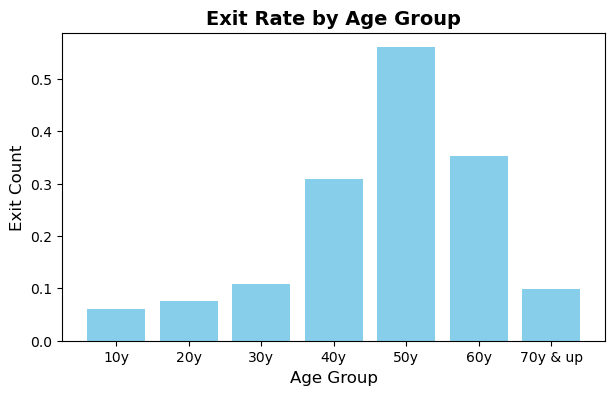

In [22]:
# Visualize churn rate by age group
AgeGroup = ['10y', '20y', '30y', '40y', '50y', '60y', '70y & up']
AgeExitRates = []

for i in AgeGroup:
    AgeExited = data.loc[(data['AgeGroup'] == i) & (data['Exited'] == 1) , :].shape[0]
    AgeData = data.loc[data['AgeGroup'] == i].shape[0]
    exit_rate = round(AgeExited / AgeData, 3) if AgeData > 0 else 0
    AgeExitRates.append(exit_rate)


plt.figure(figsize=(7, 4))
plt.bar(AgeGroup, AgeExitRates, color='skyblue')
plt.title('Exit Rate by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Exit Count', fontsize=12)
plt.show()

In [23]:
data.Tenure.value_counts()


Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [24]:
labels = ["{0} - {1}".format(i,i+2) for i in range(0,11,2) ]
labels

['0 - 2', '2 - 4', '4 - 6', '6 - 8', '8 - 10', '10 - 12']

Text(0.5, 1.0, 'Tenure Vs Churning')

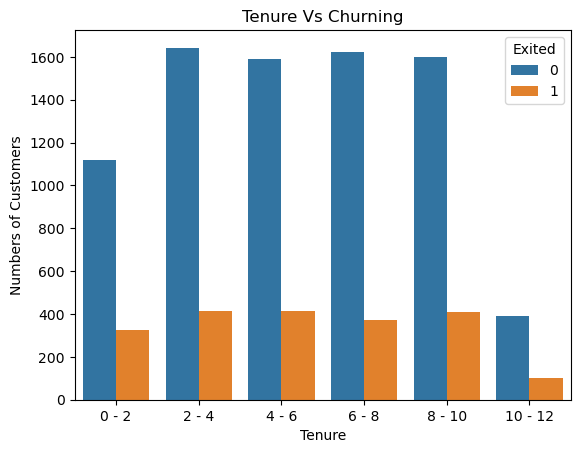

In [25]:
data["TenureGroup"] = pd.cut(data['Tenure'],range(0,13,2),labels =labels,right=False)
sns.countplot(x='TenureGroup',hue='Exited',data=data)
plt.xlabel('Tenure')
plt.ylabel('Numbers of Customers')
plt.title("Tenure Vs Churning")

In [26]:
data = pd.get_dummies(data, columns=['Gender','TenureGroup','AgeGroup'], drop_first=True)


In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
numeric_columns = ['CreditScore','Balance','EstimatedSalary']
data[numeric_columns] = ss.fit_transform(data[numeric_columns])

In [31]:
y = data['Exited']
X = data.drop(columns = 'Exited')

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=420)
print(X_train.shape)
print(X_test.shape)

(7000, 20)
(3000, 20)


In [33]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8423333333333334

Confusion Matrix:
 [[2275  123]
 [ 350  252]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      2398
           1       0.67      0.42      0.52       602

    accuracy                           0.84      3000
   macro avg       0.77      0.68      0.71      3000
weighted avg       0.83      0.84      0.83      3000



In [34]:
acc = accuracy_score(y_pred, y_test)
print(f"RF Accuracy: {acc*100}%")

RF Accuracy: 84.23333333333333%


In [35]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [36]:
report = classification_report(y_pred_lr, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      2711
           1       0.29      0.61      0.40       289

    accuracy                           0.82      3000
   macro avg       0.62      0.73      0.65      3000
weighted avg       0.89      0.82      0.85      3000



In [37]:
acc = accuracy_score(y_pred_lr, y_test)
print(f"LR Accuracy: {acc*100}%")

LR Accuracy: 82.1%


RF Accuracy: 84.23333333333333%
LR Accuracy: 82.1%